<hr style="border: 2px solid purple;">
<hr style="border: 2px solid purple;">

# Project Overview

This project focuses on building a machine learning pipeline for fraud detection using the Credit Card Fraud Detection dataset.
The steps involved include data preprocessing, visualization, outlier detection, feature scaling, and the generation of synthetic data using a Generative Adversarial Network (GAN).

1. **Data Loading and Inspection**:
   The dataset is downloaded from a public source, and initial exploratory data analysis (EDA) is conducted by inspecting the first few rows, data types, and summary statistics.

2. **Data Cleaning**:
   Missing and duplicate values are identified and handled by removing duplicates. The data is then cleaned for outliers using the Interquartile Range (IQR) method to enhance model robustness.

3. **Visualization**:
   Various visualizations like histograms, correlation heatmaps, and scatter plots are created to understand feature distributions and relationships.

4. **Feature Scaling**:
   The features are scaled using StandardScaler to normalize the data, ensuring optimal model performance.

5. **Generative Adversarial Network (GAN)**:
   A GAN is defined with a generator and discriminator. The generator creates synthetic data resembling real data, while the discriminator evaluates the authenticity of the generated data. The GAN is trained over 5000 epochs.

6. **Synthetic Data Generation**:
   The trained generator is used to create synthetic samples, which are compared to real data distributions using kernel density estimation (KDE) plots for a visual evaluation of the similarity.

7. **Model Training and Evaluation**:
   A RandomForestClassifier is trained on the combined real and synthetic data. The classifier's performance is evaluated on a test set, and accuracy and classification metrics are reported.

The overall goal of this project is to generate synthetic data for fraud detection, improve model generalization by augmenting the dataset, and evaluate the model's performance on detecting fraudulent transactions.

<hr style="border: 1px solid purple;">

In [ ]:
import warnings  # To suppress warnings

In [ ]:
warnings.filterwarnings('ignore')  # Ignore all warnings

<hr style="border: 1px solid purple;">

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from urllib.request import urlretrieve

In [ ]:
import torch

In [ ]:
import torch.nn as nn

In [ ]:
import torch.optim as optim

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

### Step 1: Load the Dataset
- Download and load the dataset directly from the web.
- Inspect the first few rows and general data structure.

In [ ]:
# Download the dataset

In [ ]:
url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"


In [ ]:
file_path = "/content/creditcard.csv"

In [ ]:
urlretrieve(url, file_path)

('/content/creditcard.csv', <http.client.HTTPMessage at 0x7a759c5c05e0>)

In [ ]:
print(f"Dataset downloaded and saved to {file_path}")

Dataset downloaded and saved to /content/creditcard.csv


In [ ]:
# Load the dataset

In [ ]:
data = pd.read_csv(file_path)

In [ ]:
# Print initial details

In [ ]:
print("\nDataset Head:")
print(data.head())


Dataset Head:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26      

In [ ]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


In [ ]:
print("\nDataset Description:")
print(data.describe())


Dataset Description:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00 

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

### Step 2: Check for Missing and Duplicate Values
- Check for missing values and duplicate rows.
- Remove duplicates to ensure data is clean.

In [ ]:
# Check for Missing and Duplicate Values

In [ ]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
print("\nDuplicate Rows:")
print(data.duplicated().sum())


Duplicate Rows:
1081


In [ ]:
# Remove duplicates

In [ ]:
data = data.drop_duplicates()

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

### Step 3: Visualizations
- Use histograms to explore feature distributions.
- Create a heatmap to check feature correlations.
- Visualize relationships between key features with scatter plots.

In [ ]:
# Draw histograms

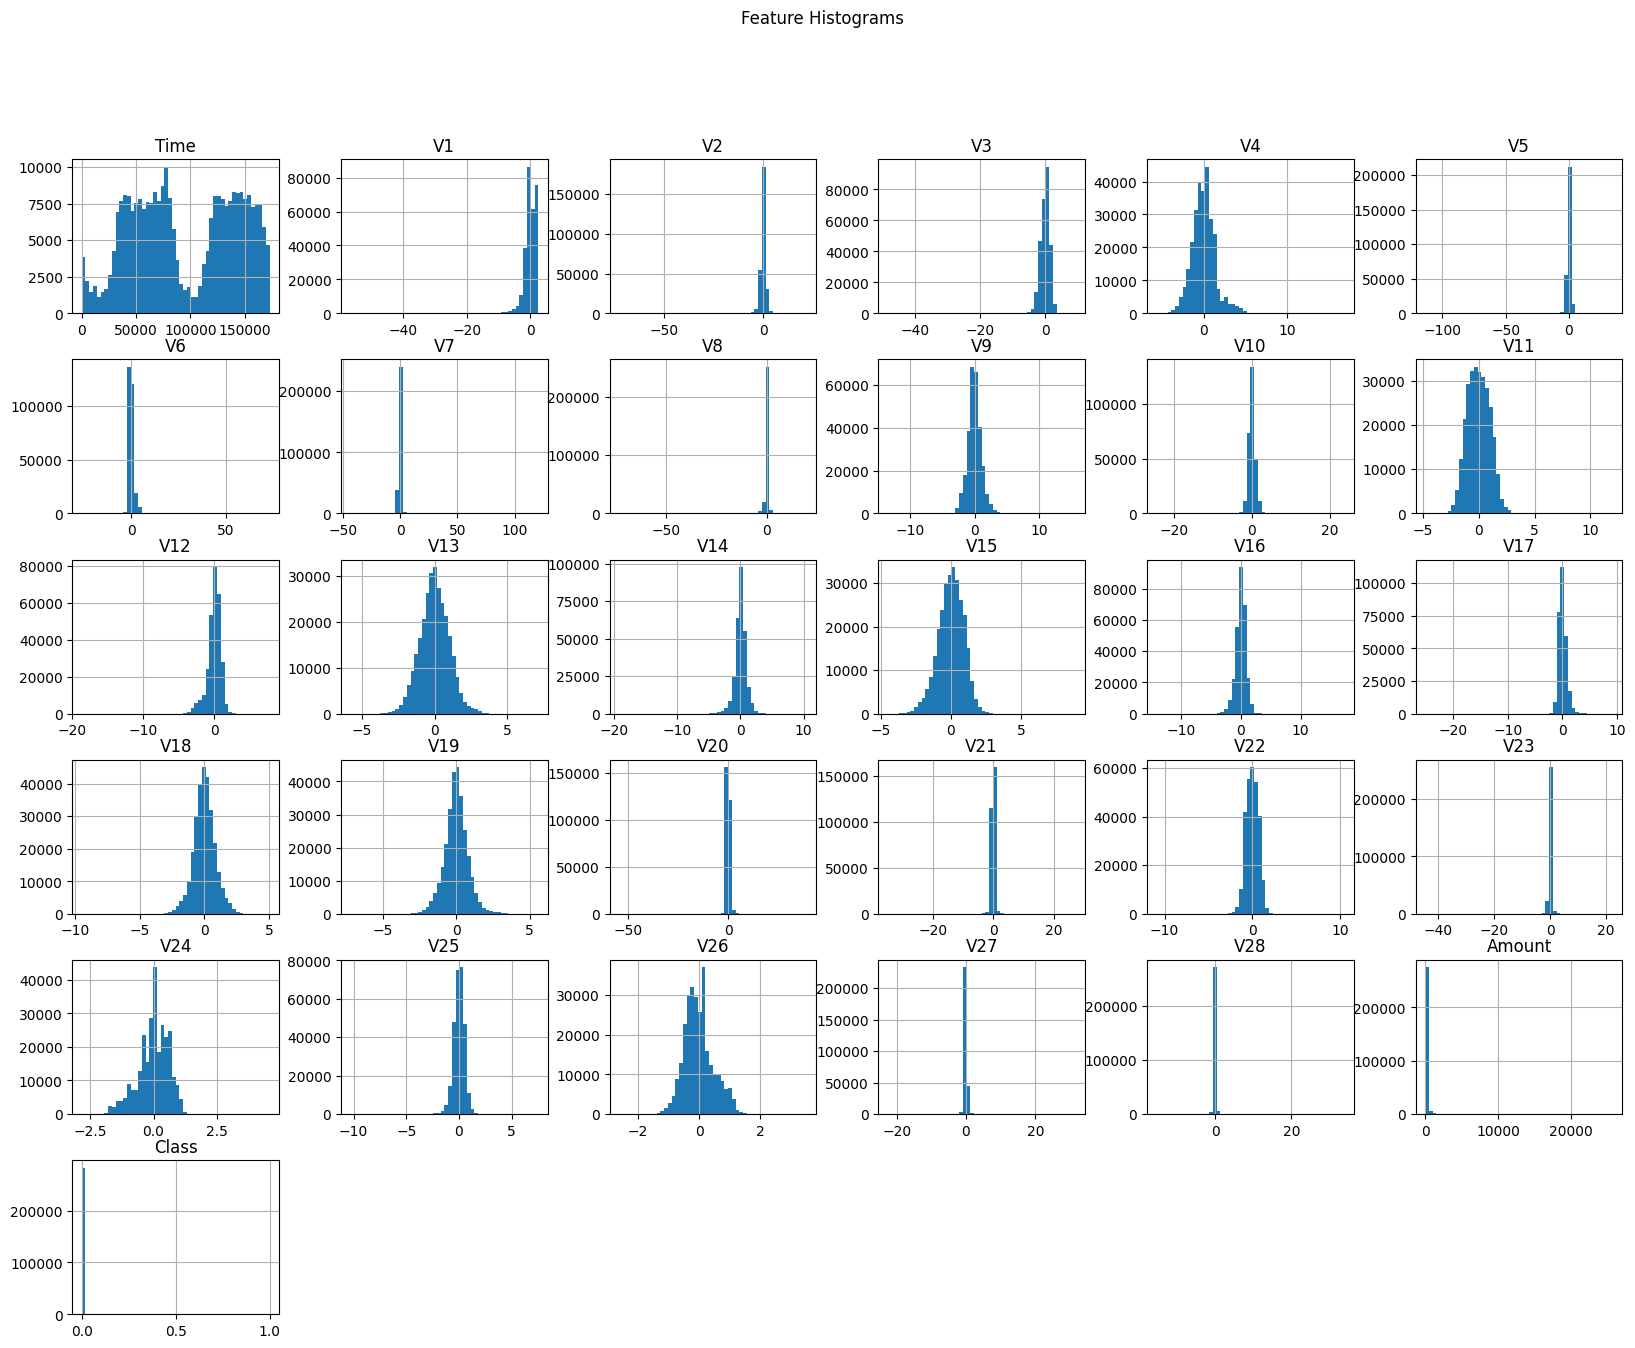

In [ ]:
data.hist(bins=50, figsize=(20, 15))
plt.suptitle("Feature Histograms")
plt.show()

In [ ]:
# Correlation heatmap

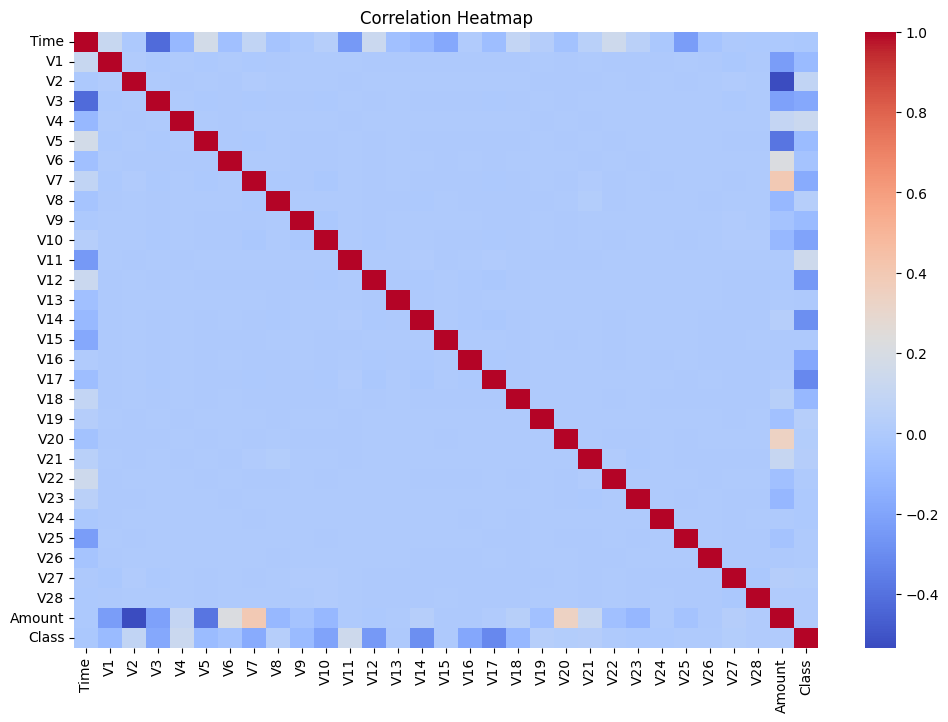

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Scatter plot for two key features (e.g., V1 vs V2)

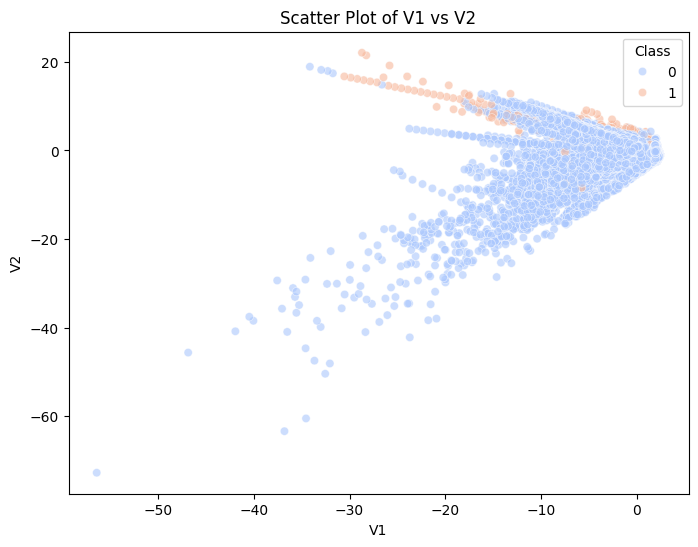

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['V1'], y=data['V2'], hue=data['Class'], alpha=0.6, palette="coolwarm")
plt.title("Scatter Plot of V1 vs V2")
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend(title="Class", loc='upper right')
plt.show()

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

### Step 4: Outlier Detection Using IQR
- Detect and remove outliers using the Interquartile Range (IQR) method.
- Clean the data to make sure only relevant data points are kept.

In [ ]:
def detect_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
        df.drop(outliers, inplace=True)
    return df

In [ ]:
# Detect and remove outliers

In [ ]:
numeric_columns = data.columns[:-1]  # Exclude 'Class' (target column)

In [ ]:
data = detect_outliers_iqr(data, numeric_columns)

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

### Step 5: Scaling the Features
- Scale the features to bring them to a common range.
- Use StandardScaler to normalize the data.

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_features = scaler.fit_transform(data.iloc[:, :-1])  # Exclude the 'Class' column


In [ ]:
scaled_data = pd.DataFrame(scaled_features, columns=data.columns[:-1])

In [ ]:
scaled_data['Class'] = data['Class'].values  # Add back the target column

In [ ]:
# Save the cleaned and scaled dataset

In [ ]:
processed_file_path = "/content/scaled_credit_risk_data.csv"

In [ ]:
scaled_data.to_csv(processed_file_path, index=False)

In [ ]:
print(f"\nProcessed and scaled dataset saved to {processed_file_path}")


Processed and scaled dataset saved to /content/scaled_credit_risk_data.csv


<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

### Step 6: Define GAN Architecture
- Define the generator and discriminator models.
- The generator creates synthetic data, while the discriminator distinguishes between real and fake data.

In [ ]:
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim),
            nn.Tanh()
        )
    def forward(self, x):
        return self.model(x)

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

In [ ]:
# Initialize GAN components

In [ ]:
input_dim = 10  # Noise vector dimension

In [ ]:
output_dim = data.shape[1] - 1  # Number of features (excluding 'Class')

In [ ]:
generator = Generator(input_dim, output_dim)

In [ ]:
discriminator = Discriminator(output_dim)

In [ ]:
lr = 0.0002

In [ ]:
gen_optimizer = optim.Adam(generator.parameters(), lr=lr)

In [ ]:
disc_optimizer = optim.Adam(discriminator.parameters(), lr=lr)

In [ ]:
loss_fn = nn.BCELoss()

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

### Step 7: Train GAN
- Train the generator and discriminator in a loop.
- The generator tries to fool the discriminator with fake data, and the discriminator learns to distinguish real from fake.
- Train through multiple epochs, adjusting weights each time.

In [ ]:
epochs = 5000

In [ ]:
batch_size = 64

In [ ]:
for epoch in range(epochs):
    # Sample real data and generate fake data
    real_data = torch.tensor(data.drop(columns=['Class']).sample(batch_size).values, dtype=torch.float32)
    z = torch.randn(batch_size, input_dim)
    fake_data = generator(z).detach()

    # Train Discriminator
    disc_real = discriminator(real_data)
    disc_fake = discriminator(fake_data)
    disc_loss = loss_fn(disc_real, torch.ones(batch_size, 1)) + \
                loss_fn(disc_fake, torch.zeros(batch_size, 1))
    disc_optimizer.zero_grad()
    disc_loss.backward()
    disc_optimizer.step()

    # Train Generator
    z = torch.randn(batch_size, input_dim)
    fake_data = generator(z)
    disc_fake = discriminator(fake_data)
    gen_loss = loss_fn(disc_fake, torch.ones(batch_size, 1))
    gen_optimizer.zero_grad()
    gen_loss.backward()
    gen_optimizer.step()

    # Print losses every 500 epochs
    if epoch % 500 == 0:
        print(f"Epoch {epoch} | D Loss: {disc_loss.item():.4f} | G Loss: {gen_loss.item():.4f}")


Epoch 0 | D Loss: 100.6798 | G Loss: 0.7132
Epoch 500 | D Loss: 0.0226 | G Loss: 3.8164
Epoch 1000 | D Loss: 0.0033 | G Loss: 5.7157
Epoch 1500 | D Loss: 0.0010 | G Loss: 6.8902
Epoch 2000 | D Loss: 0.0005 | G Loss: 7.5277
Epoch 2500 | D Loss: 0.0004 | G Loss: 7.7314
Epoch 3000 | D Loss: 0.0002 | G Loss: 8.4336
Epoch 3500 | D Loss: 0.0002 | G Loss: 8.6356
Epoch 4000 | D Loss: 0.0001 | G Loss: 8.8880
Epoch 4500 | D Loss: 0.0001 | G Loss: 9.2782


<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

### Step 8: Generate Synthetic Data and Compare Distributions
- Generate synthetic data using the trained generator.
- Compare the synthetic data’s distribution to the real data to assess quality.

In [ ]:
synthetic_samples = 10000

In [ ]:
z = torch.randn(synthetic_samples, input_dim)

In [ ]:
synthetic_data = generator(z).detach().numpy()

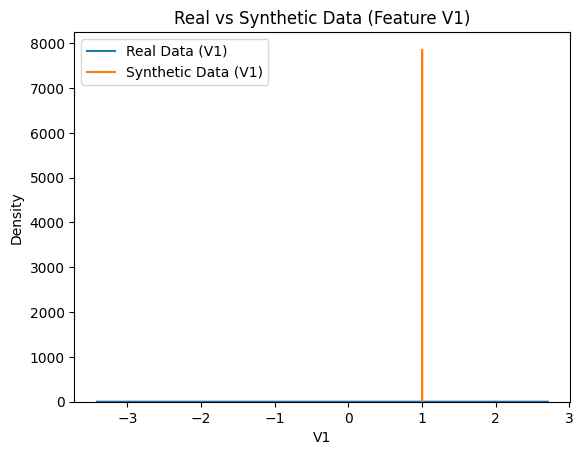

In [ ]:
sns.kdeplot(data['V1'], label="Real Data (V1)")
sns.kdeplot(synthetic_data[:, 0], label="Synthetic Data (V1)")
plt.legend()
plt.title("Real vs Synthetic Data (Feature V1)")
plt.show()

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

### Step 9: Train Classifier on Combined Dataset
- Combine real and synthetic data to train a classifier.
- Use the classifier to predict outcomes and enhance the model’s generalization.

In [ ]:
X_real = data.drop(columns=['Class']).values

In [ ]:
y_real = data['Class'].values

In [ ]:
X_combined = np.vstack([X_real, synthetic_data])

In [ ]:
y_combined = np.hstack([y_real, np.random.choice(y_real, synthetic_samples)])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)


In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(X_test)

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

### Step 10: Evaluation
- Evaluate the classifier’s performance on the test set.
- Check accuracy, precision, recall, and F1-score to measure the model’s effectiveness.

In [ ]:
# Evaluate Classifier

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9999165519255643


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23965
           1       0.00      0.00      0.00         2

    accuracy                           1.00     23967
   macro avg       0.50      0.50      0.50     23967
weighted avg       1.00      1.00      1.00     23967



<hr style="border: 2px solid purple;">
<hr style="border: 2px solid purple;">